# Preprocessing Steps

In the preprocessing phase, several transformations were applied to the fire dataset to prepare it for machine learning models. Here are the key steps performed:

1. **Seasonal Encoding:** The "day" and "month" columns were encoded into seasons. This new feature, "season," represents the season of the year when the fire occurred.

2. **Fire Label Encoding:** A new column, "fire_type," was added to classify instances as either 1 (large fire) or 0 (small fire) based on the "area" feature.

3. **Logarithmic Scaling:** Logarithmic scaling was applied to the "rain" and "area" columns to handle their skewed distributions. This transformation involves taking the natural logarithm of the values, which helps in reducing the impact of extreme values.

**Data Export:**
   - The dataset after logarithmic scaling was exported as 'data/data_log.csv,' where the "area" and "rain" columns are log-transformed.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [2]:
data = pd.read_csv("data/fires.csv") 

In [3]:
data.tail(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
507,2,4,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00
508,1,2,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00
509,5,4,aug,fri,91.0,166.9,752.6,7.1,21.1,71,7.6,1.4,2.17
510,6,5,aug,fri,91.0,166.9,752.6,7.1,18.2,62,5.4,0.0,0.43
511,8,6,aug,sun,81.6,56.7,665.6,1.9,27.8,35,2.7,0.0,0.00
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00
516,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00


In [4]:
# Filter the data for winter months (December, January, February)
spring_months = ["mar", "apr", "may"]
summer_months = ["jun", "jul", "aug"]
autumn_months = ["sep", "nov", "oct"]
winter_months = ["dec", "jan", "feb"]
spring_data = data[data['month'].isin(spring_months)]
summer_data = data[data['month'].isin(summer_months)]
autumn_data = data[data['month'].isin(autumn_months)]
winter_data = data[data['month'].isin(winter_months)]

# Calculate the mean burned area for seasons
mean_winter_area = winter_data['area'].mean()
mean_autumn_area = autumn_data['area'].mean()
mean_spring_area = spring_data['area'].mean()
mean_summer_area = summer_data['area'].mean()

print(f"Mean Burned Area for Spring Months: {mean_spring_area:.2f} hectares")
print(f"Mean Burned Area for Summer Months: {mean_summer_area:.2f} hectares")
print(f"Mean Burned Area for Autumn Months: {mean_autumn_area:.2f} hectares")
print(f"Mean Burned Area for Winter Months: {mean_winter_area:.2f} hectares")

Mean Burned Area for Spring Months: 5.44 hectares
Mean Burned Area for Summer Months: 12.26 hectares
Mean Burned Area for Autumn Months: 16.95 hectares
Mean Burned Area for Winter Months: 7.92 hectares


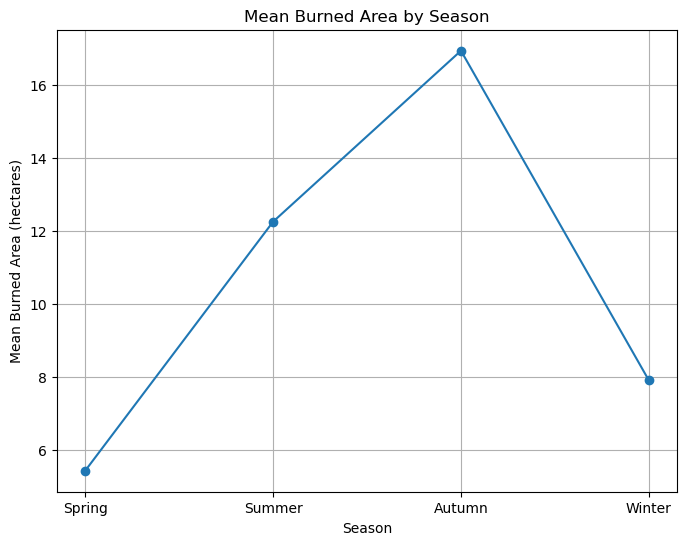

In [5]:

# Define the seasons and their mean burned areas
seasons = ["Spring", "Summer", "Autumn", "Winter"]
mean_areas = [mean_spring_area, mean_summer_area, mean_autumn_area, mean_winter_area]

# Create a line plot
plt.figure(figsize=(8, 6))
plt.plot(seasons, mean_areas, marker='o', linestyle='-')
plt.title("Mean Burned Area by Season")
plt.xlabel("Season")
plt.ylabel("Mean Burned Area (hectares)")
plt.grid(True)
plt.show()


In [5]:
# Define a mapping of months to seasons
season_mapping = {
    'jan': 'winter', 'feb': 'winter', 'mar': 'spring', 'apr': 'spring',
    'may': 'spring', 'jun': 'summer', 'jul': 'summer', 'aug': 'summer',
    'sep': 'autumn', 'oct': 'autumn', 'nov': 'autumn', 'dec': 'winter'
}
# Apply seasonal encoding to the "month" column
data['season'] = data['month'].map(season_mapping)

data_encoded = pd.get_dummies(data, columns=['season'])
data_encoded.drop(['month', 'day'], axis=1, inplace=True)


In [6]:
data_encoded.head(10)

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,season_autumn,season_spring,season_summer,season_winter
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,False,True,False,False
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,True,False,False,False
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,True,False,False,False
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,False,True,False,False
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,False,True,False,False
5,8,6,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0,False,False,True,False
6,8,6,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0,False,False,True,False
7,8,6,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0,False,False,True,False
8,8,6,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0,True,False,False,False
9,7,5,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0,True,False,False,False


In [8]:
data_encoded['fire_type'] = np.where(data_encoded['area']>6, '1', '0') #zero value means that an area is lower than 1ha/100 = 100m2 
data_encoded['fire_type']= pd.to_numeric(data_encoded['fire_type'])
data_encoded.tail(10)

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,season_autumn,season_spring,season_summer,season_winter,fire_type
507,2,4,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00,False,False,True,False,0
508,1,2,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00,False,False,True,False,0
509,5,4,91.0,166.9,752.6,7.1,21.1,71,7.6,1.4,2.17,False,False,True,False,0
510,6,5,91.0,166.9,752.6,7.1,18.2,62,5.4,0.0,0.43,False,False,True,False,0
511,8,6,81.6,56.7,665.6,1.9,27.8,35,2.7,0.0,0.00,False,False,True,False,0
512,4,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,False,False,True,False,1
513,2,4,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,False,False,True,False,1
514,7,4,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,False,False,True,False,1
515,1,4,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,False,False,True,False,0
516,6,3,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00,True,False,False,False,0


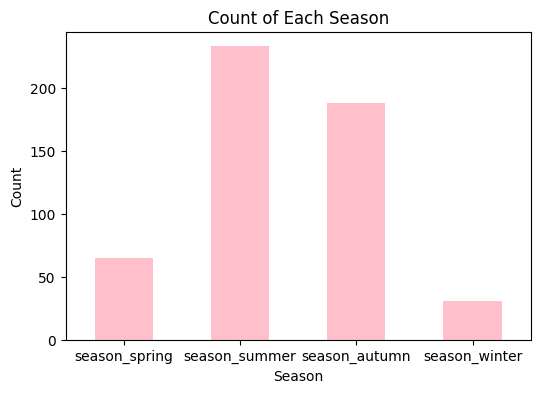

In [9]:
# Count the occurrences of each season
season_counts = data_encoded[['season_spring', 'season_summer', 'season_autumn', 'season_winter']].sum()

# Create a histogram
plt.figure(figsize=(6, 4))
season_counts.plot(kind='bar', color='pink')
plt.title("Count of Each Season")
plt.xlabel("Season")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

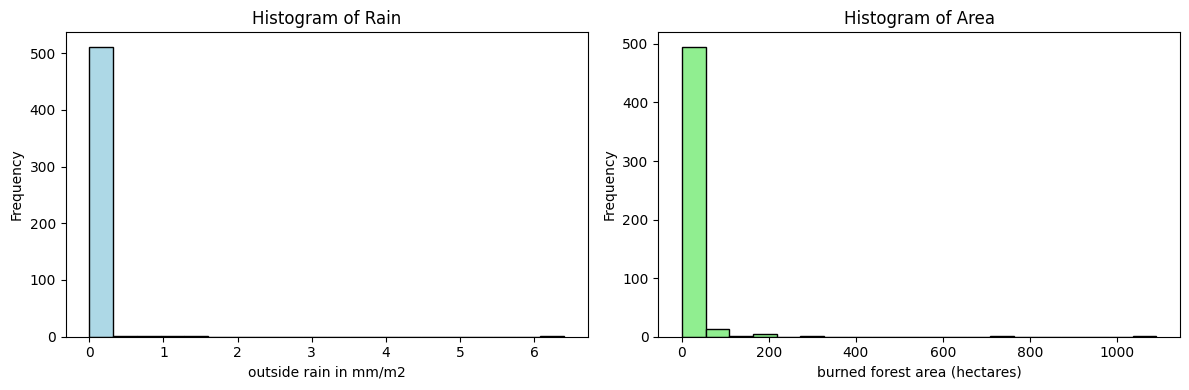

In [10]:
# Create histograms for "rain" and "area" -> before logarithmic scaling
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(data_encoded['rain'], bins=20, color='lightblue', edgecolor='black')
plt.title("Histogram of Rain")
plt.xlabel("outside rain in mm/m2")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(data_encoded['area'], bins=20, color='lightgreen', edgecolor='black')
plt.title("Histogram of Area")
plt.xlabel("burned forest area (hectares)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

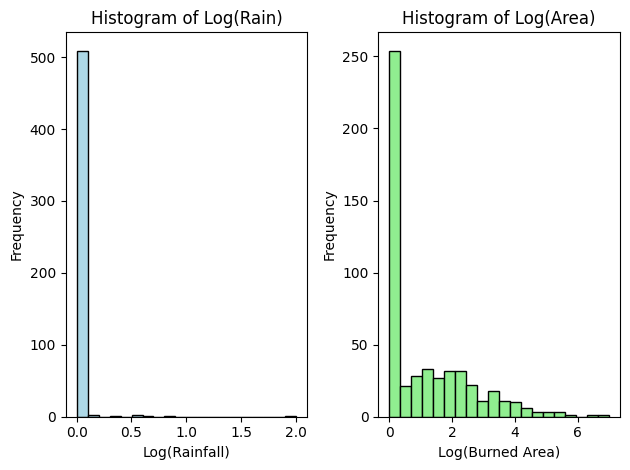

In [11]:
# Apply logarithmic scaling to "rain" and "area" -> after logarithmic scalin
data_log = data_encoded.copy()
data_log['rain'] = np.log1p(data_log['rain'])  # Logarithmic scaling with a small offset for "rain"
data_log['area'] = np.log1p(data_log['area'])  # Logarithmic scaling with a small offset for "area"

plt.subplot(1, 2, 1)
plt.hist(data_log['rain'], bins=20, color='lightblue', edgecolor='black')
plt.title("Histogram of Log(Rain)")
plt.xlabel("Log(Rainfall)")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(data_log['area'], bins=20, color='lightgreen', edgecolor='black')
plt.title("Histogram of Log(Area)")
plt.xlabel("Log(Burned Area)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [12]:
data_log.tail(10)


,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,season_autumn,season_spring,season_summer,season_winter,fire_type
507,2,4,91.0,166.9,752.6,7.1,25.9,41,3.6,0.000000,0.000000,False,False,True,False,0
508,1,2,91.0,166.9,752.6,7.1,25.9,41,3.6,0.000000,0.000000,False,False,True,False,0
509,5,4,91.0,166.9,752.6,7.1,21.1,71,7.6,0.875469,1.153732,False,False,True,False,0
510,6,5,91.0,166.9,752.6,7.1,18.2,62,5.4,0.000000,0.357674,False,False,True,False,0
511,8,6,81.6,56.7,665.6,1.9,27.8,35,2.7,0.000000,0.000000,False,False,True,False,0
512,4,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.000000,2.006871,False,False,True,False,1
513,2,4,81.6,56.7,665.6,1.9,21.9,71,5.8,0.000000,4.012592,False,False,True,False,1
514,7,4,81.6,56.7,665.6,1.9,21.2,70,6.7,0.000000,2.498152,False,False,True,False,1
515,1,4,94.4,146.0,614.7,11.3,25.6,42,4.0,0.000000,0.000000,False,False,True,False,0
516,6,3,79.5,3.0,106.7,1.1,11.8,31,4.5,0.000000,0.000000,True,False,False,False,0


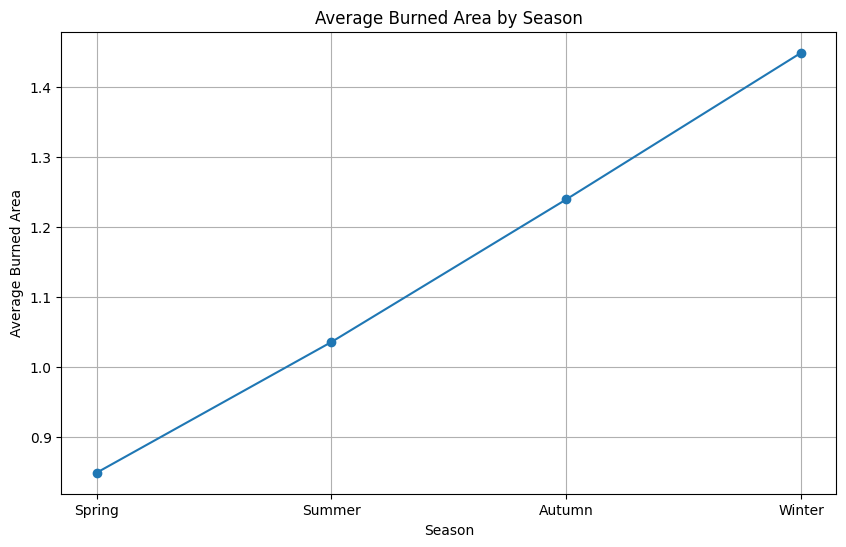

In [13]:
import matplotlib.pyplot as plt

summer_area = data_log[data_log['season_summer'] == True]['area'].mean()
autumn_area = data_log[data_log['season_autumn'] == True]['area'].mean()
spring_area = data_log[data_log['season_spring'] == True]['area'].mean()
winter_area = data_log[data_log['season_winter'] == True]['area'].mean()

# Define the seasons and their corresponding burned areas
seasons = ['Spring', 'Summer', 'Autumn', 'Winter']
burned_areas = [spring_area, summer_area, autumn_area, winter_area]

# Create a line plot to visualize the average burned area for each season
plt.figure(figsize=(10, 6))
plt.plot(seasons, burned_areas, marker='o', linestyle='-')
plt.title("Average Burned Area by Season")
plt.xlabel("Season")
plt.ylabel("Average Burned Area")
plt.grid(True)
plt.show()




In [14]:
# Filter the data for different seasons
spring_data = data_log[data_log['season_spring'] == True]
summer_data = data_log[data_log['season_summer'] == True]
autumn_data = data_log[data_log['season_autumn'] == True]
winter_data = data_log[data_log['season_winter'] == True]

# Calculate the mean burned area for each season
mean_spring_area = spring_data['area'].mean()
mean_summer_area = summer_data['area'].mean()
mean_autumn_area = autumn_data['area'].mean()
mean_winter_area = winter_data['area'].mean()

print(f"Mean Burned Area for Spring Season: {mean_spring_area:.2f} hectares")
print(f"Mean Burned Area for Summer Season: {mean_summer_area:.2f} hectares")
print(f"Mean Burned Area for Autumn Season: {mean_autumn_area:.2f} hectares")
print(f"Mean Burned Area for Winter Season: {mean_winter_area:.2f} hectares")


Mean Burned Area for Spring Season: 0.85 hectares
Mean Burned Area for Summer Season: 1.04 hectares
Mean Burned Area for Autumn Season: 1.24 hectares
Mean Burned Area for Winter Season: 1.45 hectares


In [15]:
# Export data_log to CSV
data_log.to_csv('data/data_log.csv', index=False)